In [37]:
#IMPORT DATA
import pandas as pd
import matplotlib.pyplot as plt

# Dateien einlesen
merged = pd.read_csv('merged_data.csv')
holidays = pd.read_csv('Feiertage_holidays_sh_2013_2019.csv')
ferien = pd.read_csv('Ferien_SH.csv')

# Anzeigen der ersten Zeilen
merged.head(), holidays.head(), ferien.head()

(        id        date  Warengruppe      umsatz  Bewoelkung  Temperatur  \
 0  1307011  2013-07-01            1  148.828353         6.0     17.8375   
 1  1307021  2013-07-02            1  159.793757         3.0     17.3125   
 2  1307031  2013-07-03            1  111.885594         7.0     21.0750   
 3  1307041  2013-07-04            1  168.864941         7.0     18.8500   
 4  1307051  2013-07-05            1  171.280754         5.0     19.9750   
 
    Windgeschwindigkeit  Wettercode  KielerWoche  
 0                 15.0        20.0          NaN  
 1                 10.0         NaN          NaN  
 2                  6.0        61.0          NaN  
 3                  7.0        20.0          NaN  
 4                 12.0         NaN          NaN  ,
         datum  is_holiday
 0  2013-01-01           1
 1  2013-01-02           0
 2  2013-01-03           0
 3  2013-01-04           0
 4  2013-01-05           0,
          date
 0   Ferien_SH
 1  2013-01-31
 2  2013-02-01
 3  2013-03-

In [38]:
# DATETIME CONVERSION
# Konvertieren der Datums-Spalten in datetime-Objekte
merged["date"] = pd.to_datetime(merged["date"])
holidays["datum"] = pd.to_datetime(holidays["datum"])
ferien["date"] = pd.to_datetime(ferien["date"], errors="coerce")

C:\Users\Viki\AppData\Local\Temp\ipykernel_24596\168954816.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ferien["date"] = pd.to_datetime(ferien["date"], errors="coerce")


In [39]:
# SORTING AND INDEXING
merged = merged.sort_values(["Warengruppe", "date"])
merged = merged.set_index("date")

In [40]:
#MOVING AVERAGE CALCULATION
# Berechnung des gleitenden 7-Tage-Durchschnitts des Umsatzes pro Warengruppe
merged["umsatz_ma7"] = (
    merged.groupby("Warengruppe")["umsatz"]
        .transform(lambda s: s.rolling(7, min_periods=1).mean())
)

In [41]:
#CALCULATE PERCENTAGE DIFFERENCE
merged["umsatz_pct_change"] = (
    merged.groupby("Warengruppe")["umsatz"]
        .transform(lambda s: s.pct_change())
)

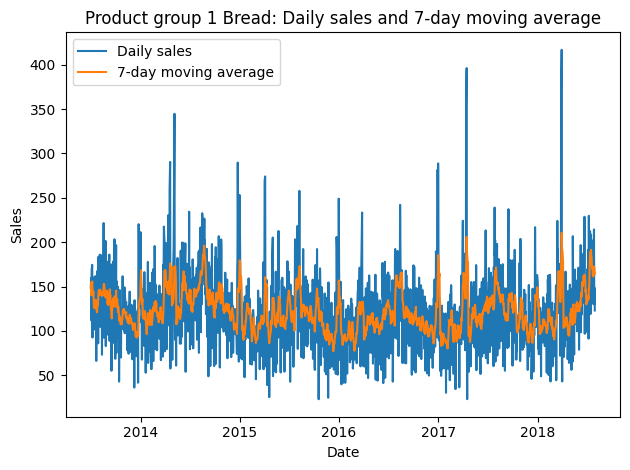

In [42]:
#PLOT FOR WARENGRUPPE 1 Brot
g = 1  # Produktgruppe

df_g = merged[merged["Warengruppe"] == g]

plt.figure()
plt.plot(df_g.index, df_g["umsatz"], label="Daily sales")
plt.plot(df_g.index, df_g["umsatz_ma7"], label="7-day moving average")
plt.title(f"Product group {g} Bread: Daily sales and 7-day moving average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

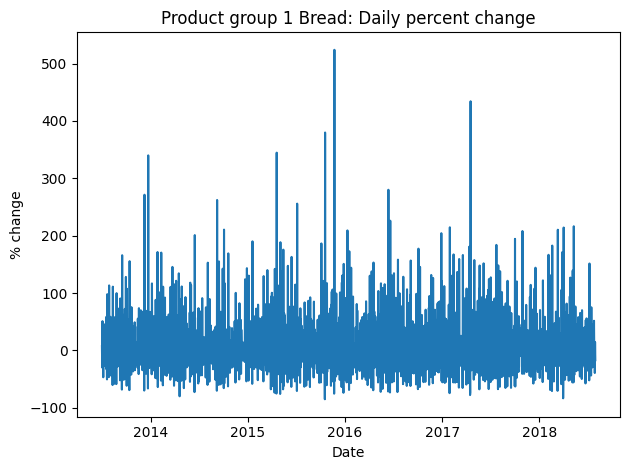

In [43]:
#PLOT PERCENT CHANGE FOR WARENGRUPPE 1 Brot
plt.figure()
plt.plot(df_g.index, df_g["umsatz_pct_change"] * 100)
plt.title(f"Product group {g} Bread: Daily percent change")
plt.xlabel("Date")
plt.ylabel("% change")
plt.tight_layout()
plt.show()

In [44]:

import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
df = pd.read_csv('merged_data.csv')

# Datum vorbereiten
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(["Warengruppe", "date"]).set_index("date")

# Moving Average
df["umsatz_ma7"] = (
    df.groupby("Warengruppe")["umsatz"]
        .transform(lambda s: s.rolling(7, min_periods=1).mean())
)

# Prozentänderung
df["umsatz_pct_change"] = (
    df.groupby("Warengruppe")["umsatz"]
        .transform(lambda s: s.pct_change())
)


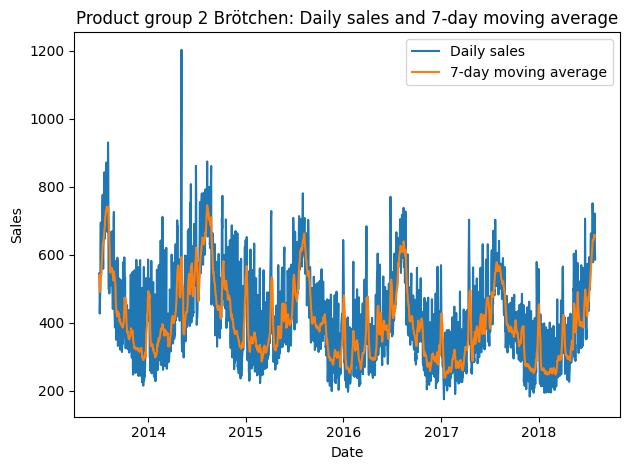

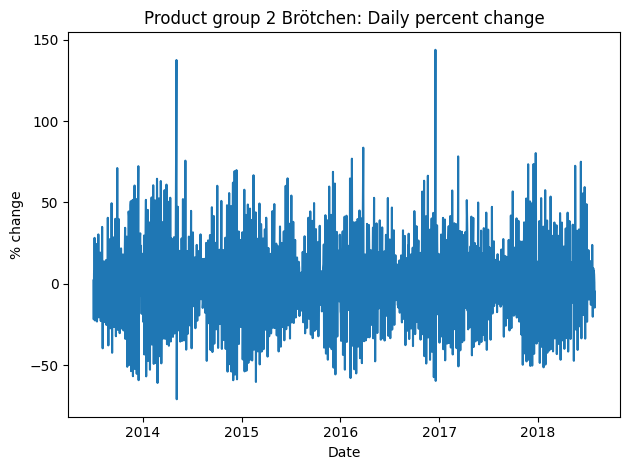

In [45]:
# PLOT PERCENT CHANGE FOR WARENGRUPPE 2 Brötchen
g = 2
df_g = df[df["Warengruppe"] == g]

plt.figure()
plt.plot(df_g.index, df_g["umsatz"], label="Daily sales")
plt.plot(df_g.index, df_g["umsatz_ma7"], label="7-day moving average")
plt.title(f"Product group {g} Brötchen: Daily sales and 7-day moving average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(df_g.index, df_g["umsatz_pct_change"] * 100)
plt.title(f"Product group {g} Brötchen: Daily percent change")
plt.xlabel("Date")
plt.ylabel("% change")
plt.tight_layout()
plt.show()

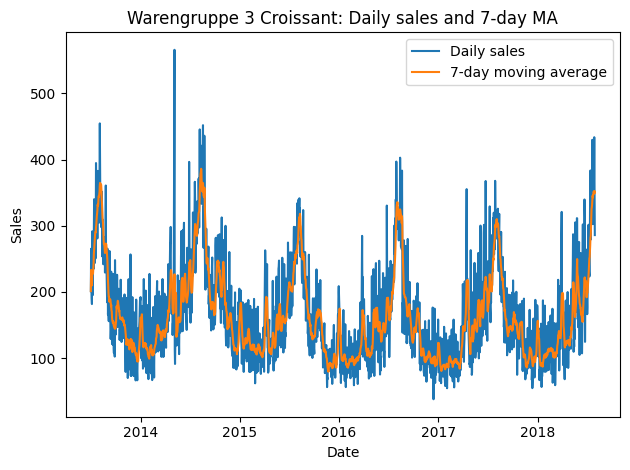

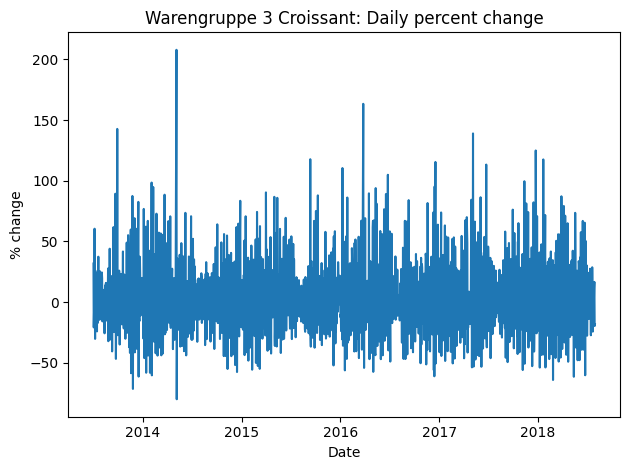

In [46]:
g = 3
df_g = df[df["Warengruppe"] == g]

plt.figure()
plt.plot(df_g.index, df_g["umsatz"], label="Daily sales")
plt.plot(df_g.index, df_g["umsatz_ma7"], label="7-day moving average")
plt.title("Warengruppe 3 Croissant: Daily sales and 7-day MA")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(df_g.index, df_g["umsatz_pct_change"] * 100)
plt.title("Warengruppe 3 Croissant: Daily percent change")
plt.xlabel("Date")
plt.ylabel("% change")
plt.tight_layout()
plt.show()


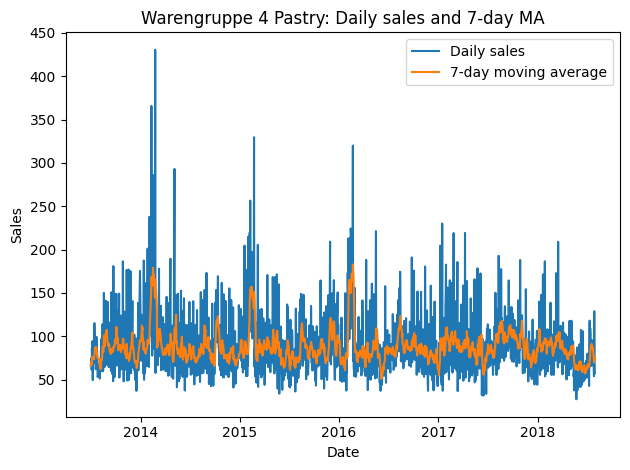

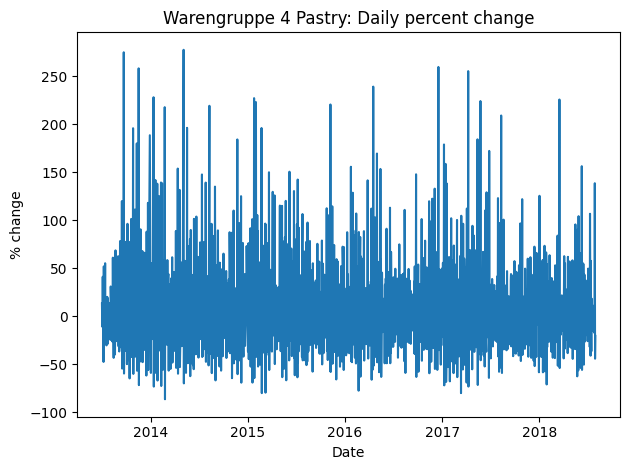

In [47]:
g = 4
df_g = df[df["Warengruppe"] == g]

plt.figure()
plt.plot(df_g.index, df_g["umsatz"], label="Daily sales")
plt.plot(df_g.index, df_g["umsatz_ma7"], label="7-day moving average")
plt.title("Warengruppe 4 Pastry: Daily sales and 7-day MA")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(df_g.index, df_g["umsatz_pct_change"] * 100)
plt.title("Warengruppe 4 Pastry: Daily percent change")
plt.xlabel("Date")
plt.ylabel("% change")
plt.tight_layout()
plt.show()


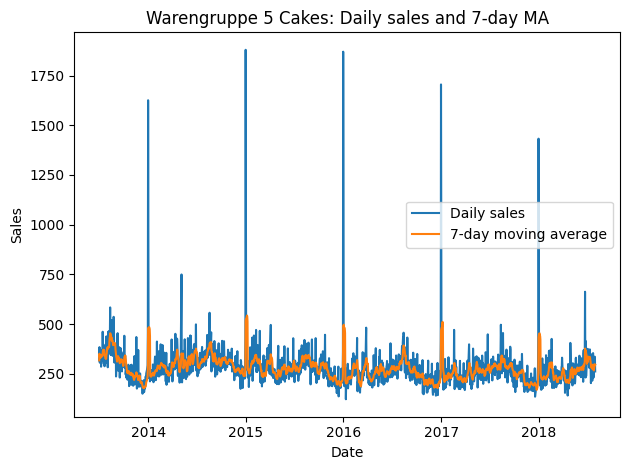

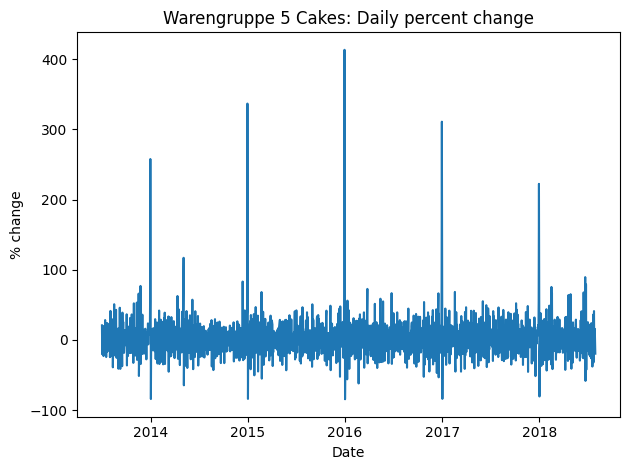

In [48]:
g = 5
df_g = df[df["Warengruppe"] == g]

plt.figure()
plt.plot(df_g.index, df_g["umsatz"], label="Daily sales")
plt.plot(df_g.index, df_g["umsatz_ma7"], label="7-day moving average")
plt.title("Warengruppe 5 Cakes: Daily sales and 7-day MA")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(df_g.index, df_g["umsatz_pct_change"] * 100)
plt.title("Warengruppe 5 Cakes: Daily percent change")
plt.xlabel("Date")
plt.ylabel("% change")
plt.tight_layout()
plt.show()


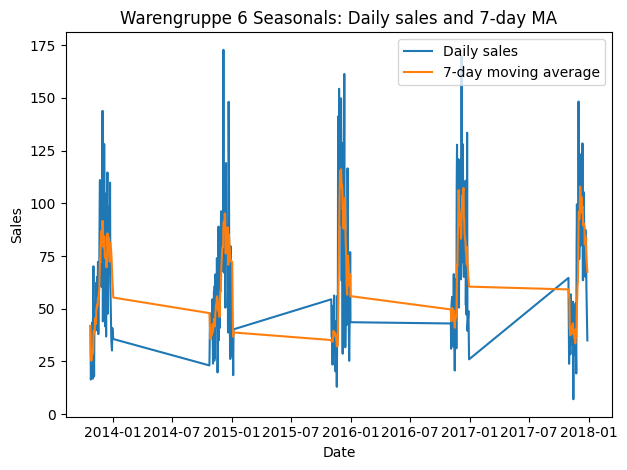

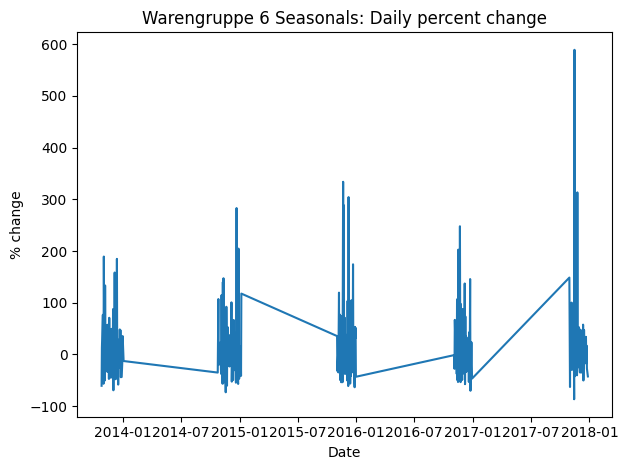

In [49]:
g = 6
df_g = df[df["Warengruppe"] == g]

plt.figure()
plt.plot(df_g.index, df_g["umsatz"], label="Daily sales")
plt.plot(df_g.index, df_g["umsatz_ma7"], label="7-day moving average")
plt.title("Warengruppe 6 Seasonals: Daily sales and 7-day MA")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(df_g.index, df_g["umsatz_pct_change"] * 100)
plt.title("Warengruppe 6 Seasonals: Daily percent change")
plt.xlabel("Date")
plt.ylabel("% change")
plt.tight_layout()
plt.show()


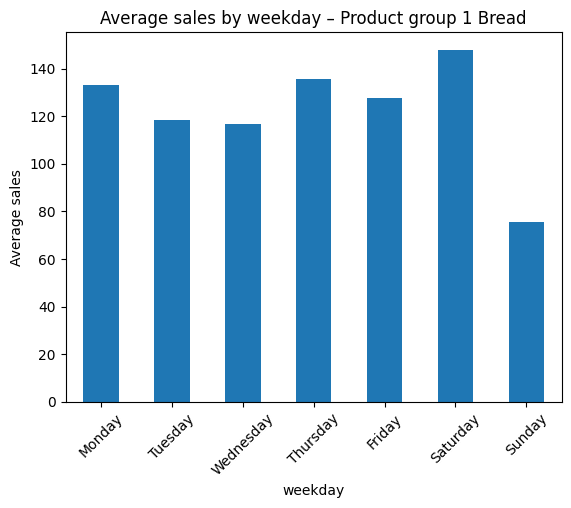

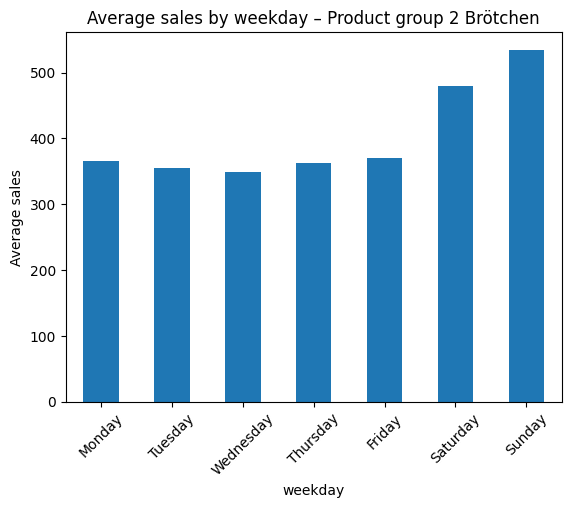

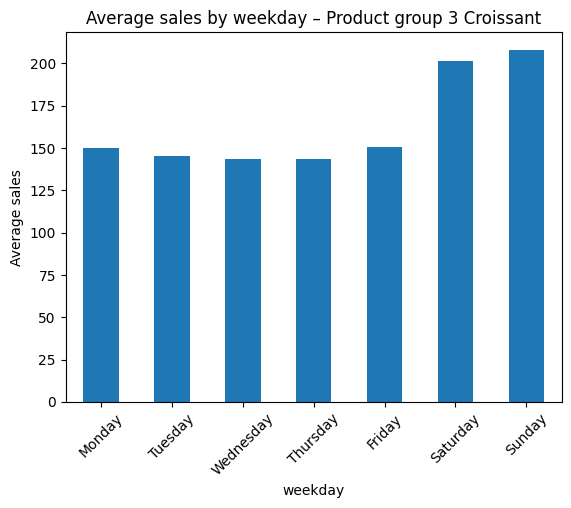

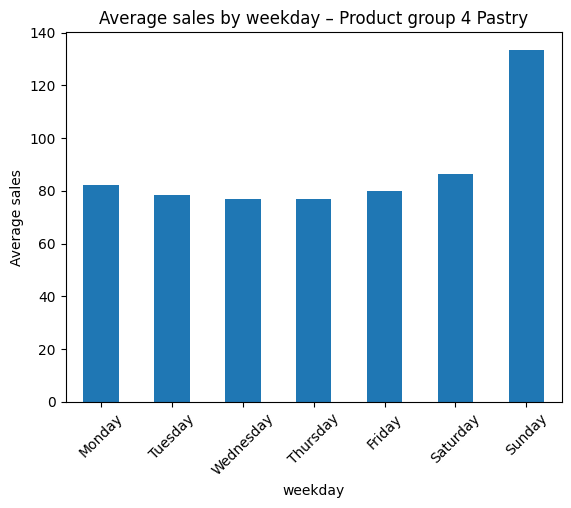

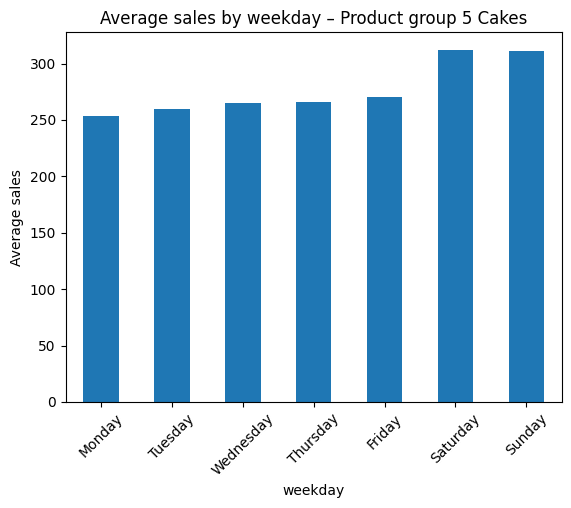

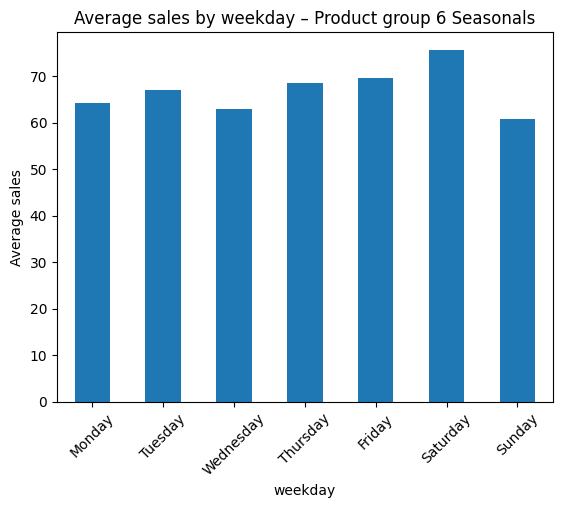

In [50]:
#WEEKDAY ANALYSIS
df_weekday = merged.reset_index()
df_weekday["weekday"] = df_weekday["date"].dt.day_name()

weekday_summary = (
    df_weekday
      .groupby(["Warengruppe", "weekday"])["umsatz"]
      .mean()
      .unstack()
      .reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
)

weekday_summary

weekday_summary.loc[1].plot(kind="bar")
plt.title("Average sales by weekday – Product group 1 Bread")
plt.ylabel("Average sales")
plt.xticks(rotation=45)
plt.show()

weekday_summary.loc[2].plot(kind="bar")
plt.title("Average sales by weekday – Product group 2 Brötchen")
plt.ylabel("Average sales")
plt.xticks(rotation=45)
plt.show()

weekday_summary.loc[3].plot(kind="bar")
plt.title("Average sales by weekday – Product group 3 Croissant")
plt.ylabel("Average sales")
plt.xticks(rotation=45)
plt.show()

weekday_summary.loc[4].plot(kind="bar")
plt.title("Average sales by weekday – Product group 4 Pastry")
plt.ylabel("Average sales")
plt.xticks(rotation=45)
plt.show()

weekday_summary.loc[5].plot(kind="bar")
plt.title("Average sales by weekday – Product group 5 Cakes")
plt.ylabel("Average sales")
plt.xticks(rotation=45)
plt.show()

weekday_summary.loc[6].plot(kind="bar")
plt.title("Average sales by weekday – Product group 6 Seasonals")
plt.ylabel("Average sales")
plt.xticks(rotation=45)
plt.show()

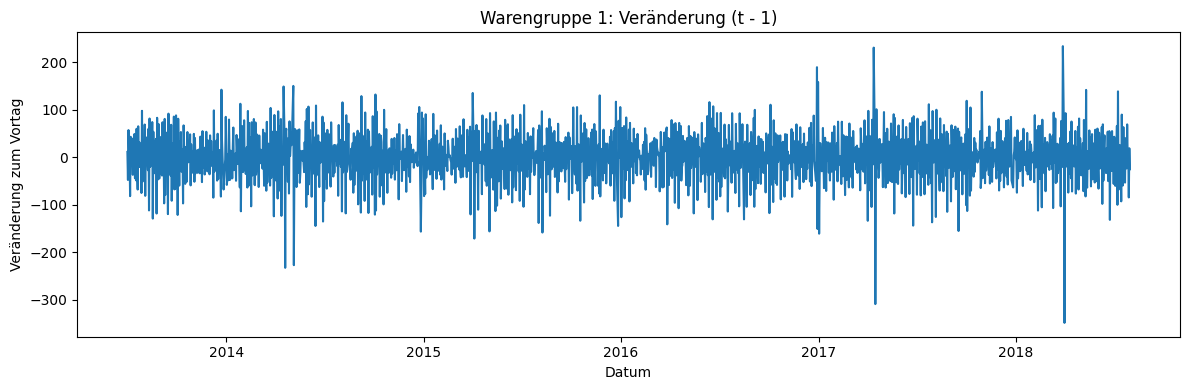

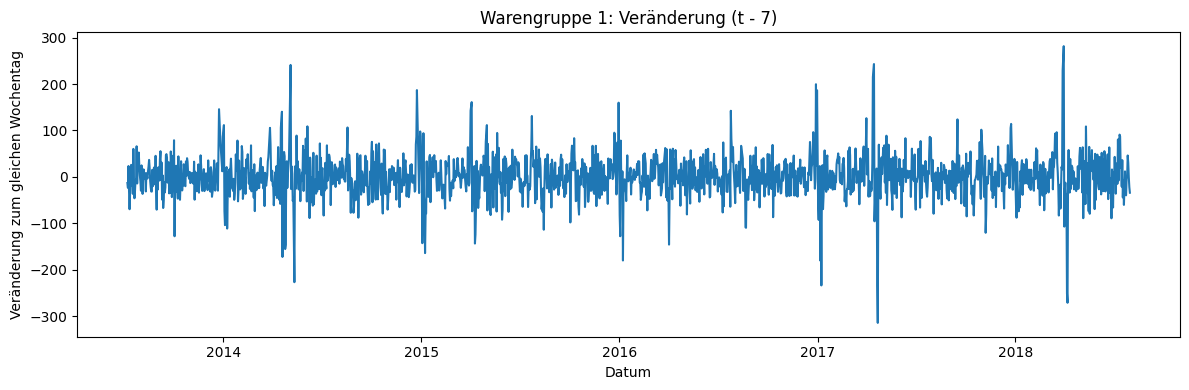

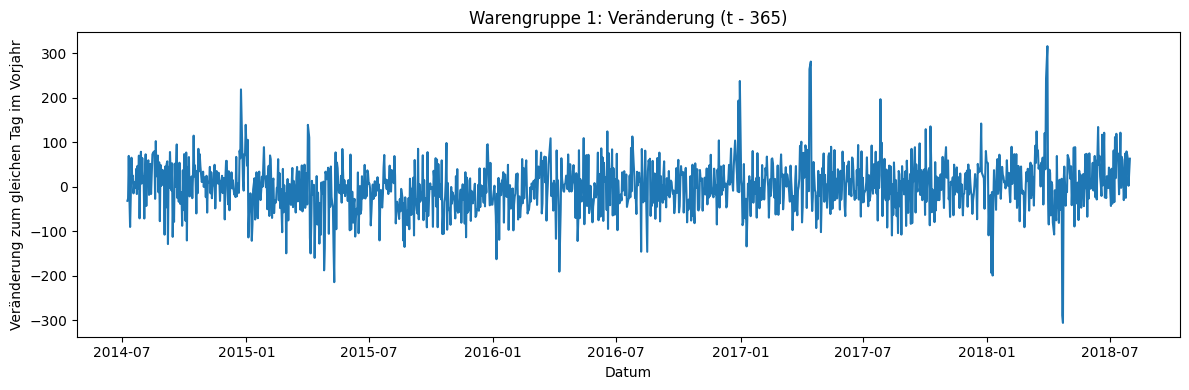

In [51]:
#DIFFERENCING
# compute difference columns first so filtered df_g contains them
df['diff_1'] = df['umsatz'].diff()
df['diff_7'] = df.groupby("Warengruppe")["umsatz"].diff(7)
# use groupby for yearly diff as well to avoid cross-group subtraction
df['diff_365'] = df.groupby("Warengruppe")["umsatz"].diff(365)

g = 1
df_g = df[df["Warengruppe"] == g]

plt.figure(figsize=(12,4))
plt.plot(df_g.index, df_g["diff_1"])
plt.title(f"Warengruppe {g}: Veränderung (t - 1)")
plt.xlabel("Datum")
plt.ylabel("Veränderung zum Vortag")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(df_g.index, df_g["diff_7"])
plt.title(f"Warengruppe {g}: Veränderung (t - 7)")
plt.xlabel("Datum")
plt.ylabel("Veränderung zum gleichen Wochentag")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(df_g.index, df_g["diff_365"])
plt.title(f"Warengruppe {g}: Veränderung (t - 365)")
plt.xlabel("Datum")
plt.ylabel("Veränderung zum gleichen Tag im Vorjahr")
plt.tight_layout()
plt.show()




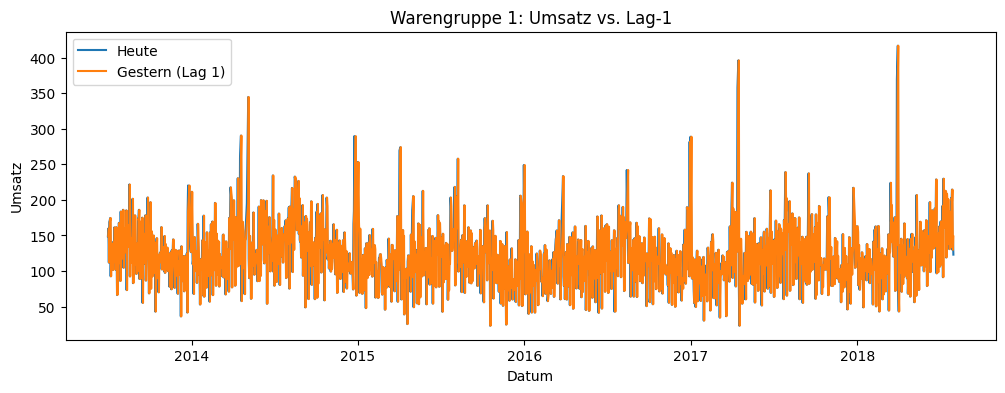

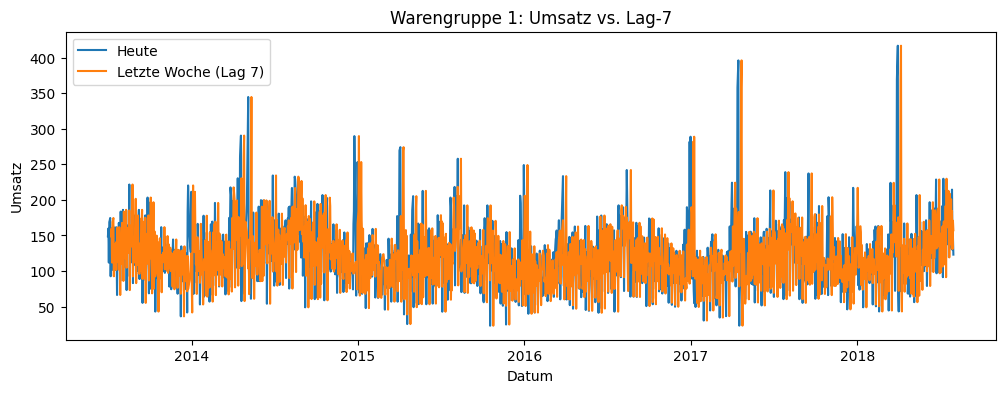

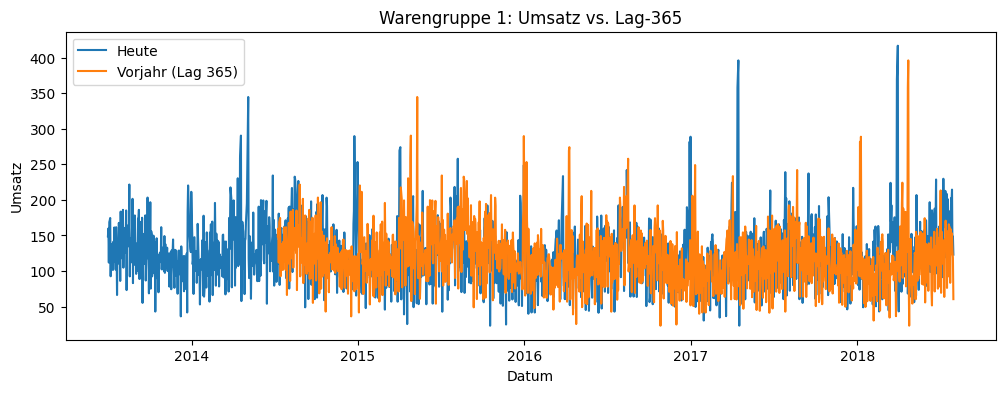

In [52]:
#LAG ANALYSIS
df['lag_1'] = df['umsatz'].shift(1)
df['lag_7'] = df['umsatz'].shift(7)
df['lag_365'] = df['umsatz'].shift(365)

g = 1
df_g = df[df["Warengruppe"] == g]

plt.figure(figsize=(12,4))
plt.plot(df_g.index, df_g["umsatz"], label="Heute")
plt.plot(df_g.index, df_g["lag_1"], label="Gestern (Lag 1)")
plt.title(f"Warengruppe {g}: Umsatz vs. Lag-1")
plt.xlabel("Datum")
plt.ylabel("Umsatz")
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(df_g.index, df_g["umsatz"], label="Heute")
plt.plot(df_g.index, df_g["lag_7"], label="Letzte Woche (Lag 7)")
plt.title(f"Warengruppe {g}: Umsatz vs. Lag-7")
plt.xlabel("Datum")
plt.ylabel("Umsatz")
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(df_g.index, df_g["umsatz"], label="Heute")
plt.plot(df_g.index, df_g["lag_365"], label="Vorjahr (Lag 365)")
plt.title(f"Warengruppe {g}: Umsatz vs. Lag-365")
plt.xlabel("Datum")
plt.ylabel("Umsatz")
plt.legend()
plt.show()



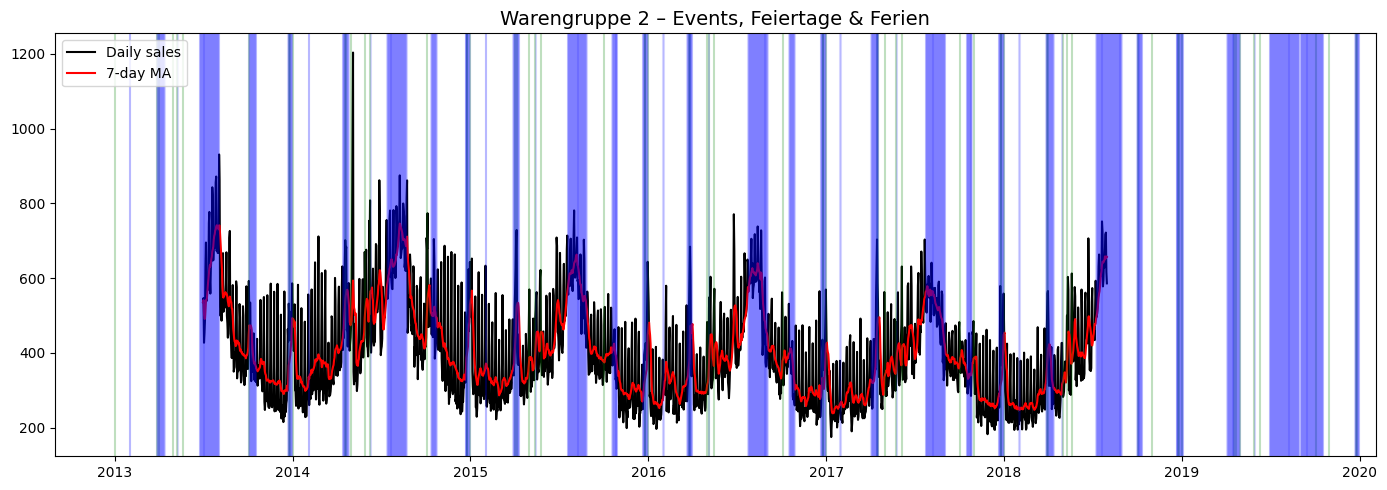

In [53]:
#EVENTS 
g = 2
df_g = df[df["Warengruppe"] == g]

plt.figure(figsize=(14,5))
plt.plot(df_g.index, df_g["umsatz"], label="Daily sales", color="black")
plt.plot(df_g.index, df_g["umsatz_ma7"], label="7-day MA", color="red")



# Feiertage einzeichnen
holiday_dates = holidays[holidays["is_holiday"] == 1]["datum"]

for d in holiday_dates:
    plt.axvline(pd.Timestamp(d), color="green", alpha=0.25)

# Ferien einzeichnen
ferien_dates = ferien["date"].dropna()

for d in ferien_dates:
    plt.axvline(pd.Timestamp(d), color="blue", alpha=0.15)

plt.title(f"Warengruppe {g} – Events, Feiertage & Ferien", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Warengruppe 2 - observations: 1819
Warengruppe 2 - observations: 1819


<Figure size 1000x400 with 0 Axes>

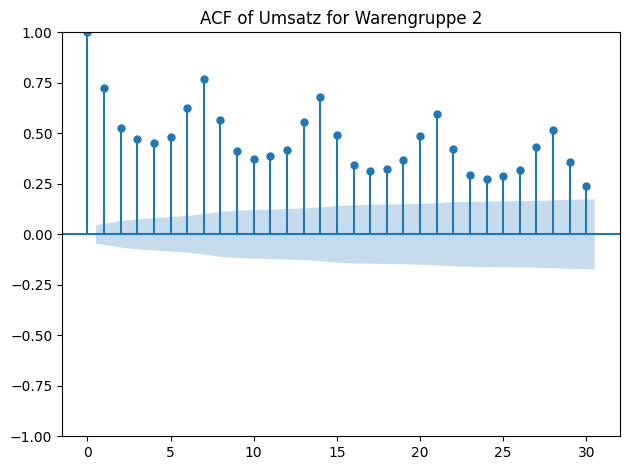

lag 1: autocorr=0.723
lag 7: autocorr=0.776
lag 30: autocorr=0.253
lag 365: autocorr=0.448


In [54]:
# ACF Analysis for Warengruppe g=2
# install missing package (required for statsmodels)
%pip install -q statsmodels

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd

# Wähle die Warengruppe (anpassen falls nötig)
g = 2

# Stelle sicher, dass der Index datetime ist (sicherer Umgang)
try:
    if not isinstance(merged.index, pd.DatetimeIndex):
        merged.index = pd.to_datetime(merged.index)
except Exception as e:
    print('Index conversion error:', e)

# Extrahiere die Umsatzserie für die Gruppe und entferne NaNs
series = merged.loc[merged['Warengruppe'] == g, 'umsatz'].dropna()
n = len(series)
print(f'Warengruppe {g} - observations: {n}')
if n < 10:
    print('Zu wenige Beobachtungen für ACF (brauche >=10).')
else:
    plt.figure(figsize=(10,4))
    plot_acf(series, lags=30, missing='drop')
    plt.title(f'ACF of Umsatz for Warengruppe {g}')
    plt.tight_layout()
    plt.show()

# Ausgabe einiger Autokorrelationswerte für wichtige Lags
for lag in [1,7,30,365]:
    if n > lag:
        ac = series.autocorr(lag=lag)
        print(f'lag {lag}: autocorr={ac:.3f}')
    else:
        print(f'lag {lag}: not enough data (n={n})')